In [2]:
# 数据集的分割
import math
import os
import shutil
from collections import Counter

data_dir = r"E:\data_set\My_dataset\dog-breed-identification"  # 数据集的根目录
label_file = 'labels.csv'  # 根目录中csv的文件名加后缀
train_dir = 'train'  # 根目录中的训练集文件夹的名字
test_dir = 'test'  # 根目录中的测试集文件夹的名字
input_dir = 'train_valid_test'  # 用于存放拆分数据集的文件夹的名字，可以不用先创建，会自动创建
batch_size = 4  # 送往训练的一批次中的数据集的个数
valid_ratio = 0.1  # 将训练集拆分为90%为训练集10%为验证集

## 文件处理

In [3]:
os.path.join(data_dir, label_file)

'E:\\data_set\\My_dataset\\dog-breed-identification\\labels.csv'

In [4]:
with open(os.path.join(data_dir, label_file), 'r') as f:
    # 跳过文件头行（栏名称）。
    lines = f.readlines()[1:]

作用——跳过文件头行(栏名称)。    去掉了'id,breed\n',

    如果是f.readlines()输出：
    ['id,breed\n',
     '000bec180eb18c7604dcecc8fe0dba07,boston_bull\n',
     '001513dfcb2ffafc82cccf4d8bbaba97,dingo\n',
     '001cdf01b096e06d78e9e5112d419397,pekinese\n',

    如果是f.readlines()[1:]
    ['000bec180eb18c7604dcecc8fe0dba07,boston_bull\n',
     '001513dfcb2ffafc82cccf4d8bbaba97,dingo\n',
     '001cdf01b096e06d78e9e5112d419397,pekinese\n',
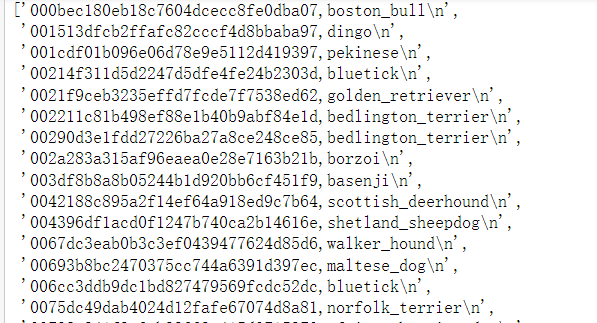

In [12]:
with open(os.path.join(data_dir, label_file), 'r') as f:
    # 跳过文件头行（栏名称）。
    lines = f.readlines()[1:]
    tokens = [l.rstrip().split(',') for l in lines]

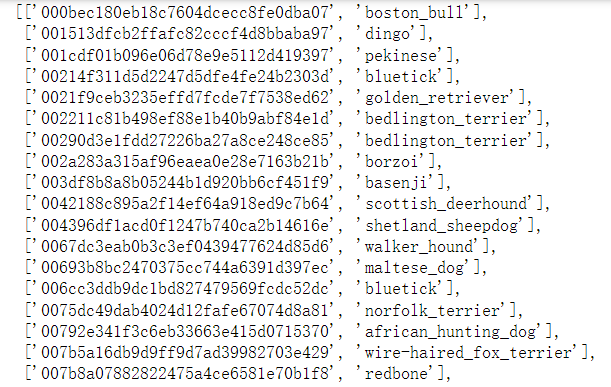

In [15]:
# split 分割函数  (以"(Colour)."为分割线)
str0 = "36.25HZ.1(Colour).jpg"
str1 = str0.split("(Colour).")
str1

['36.25HZ.1', 'jpg']

In [17]:
# 
a4=" This is string example!  "
# a4 = \nThis is string example!\n\n(两个空格)
a4.rstrip() #删除字符串尾部空格

' This is string example!'

In [19]:
with open(os.path.join(data_dir, label_file), 'r') as f:
    # 跳过文件头行（栏名称）。
    lines = f.readlines()[1:]
    tokens = [l.rstrip().split(',') for l in lines]
    idx_label = dict(((idx, label) for idx, label in tokens))

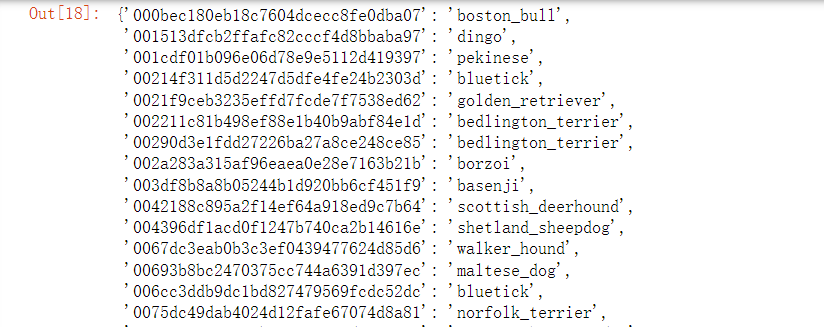

In [21]:
labels = set(idx_label.values())

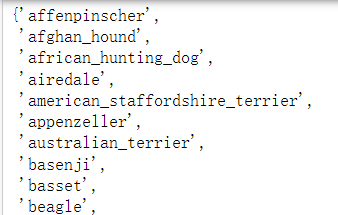

In [23]:
# train 数据集里有多少照片
num_train = len(os.listdir(os.path.join(data_dir, train_dir)))
num_train

10222

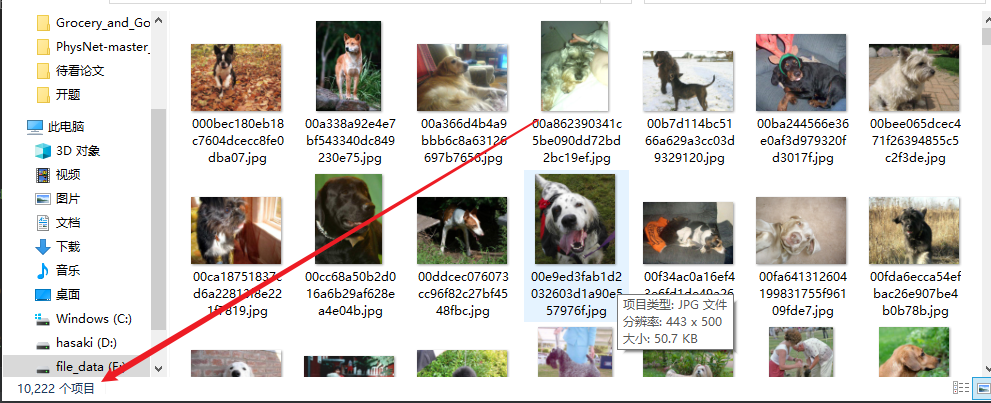

In [24]:
# 训练集中数量最少一类的狗的数量。
min_num_train_per_label = (
    Counter(idx_label.values()).most_common()[:-2:-1][0][1])
min_num_train_per_label

66

In [26]:
# 验证集中每类狗的数量。
num_valid_per_label = math.floor(min_num_train_per_label * valid_ratio)
num_valid_per_label

6

In [36]:
label_count = dict()

In [27]:
def mkdir_if_not_exist(path):
    if not os.path.exists(os.path.join(*path)):
        os.makedirs(os.path.join(*path))

In [31]:
# 整理训练和验证集。
for train_file in os.listdir(os.path.join(data_dir, train_dir)):
    idx = train_file.split('.')[0]
idx

'fff43b07992508bc822f33d8ffd902ae'

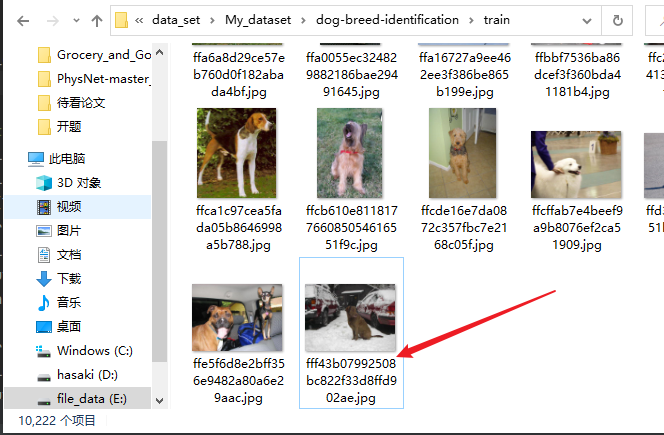

In [32]:
for train_file in os.listdir(os.path.join(data_dir, train_dir)):
    idx = train_file.split('.')[0]
    label = idx_label[idx]
label

'chesapeake_bay_retriever'

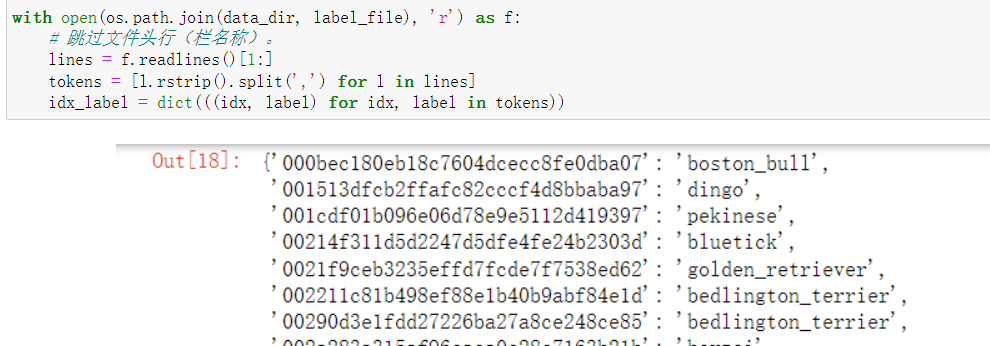

In [33]:
# 整理训练和验证集。
for train_file in os.listdir(os.path.join(data_dir, train_dir)):
    idx = train_file.split('.')[0]
    label = idx_label[idx]
    mkdir_if_not_exist([data_dir, input_dir, 'train_valid', label])

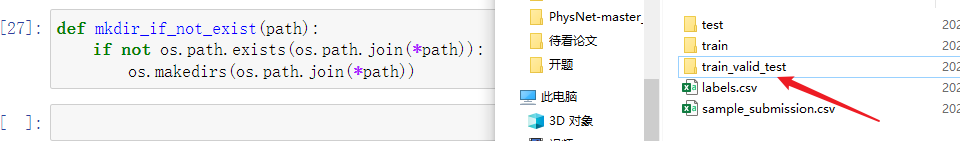

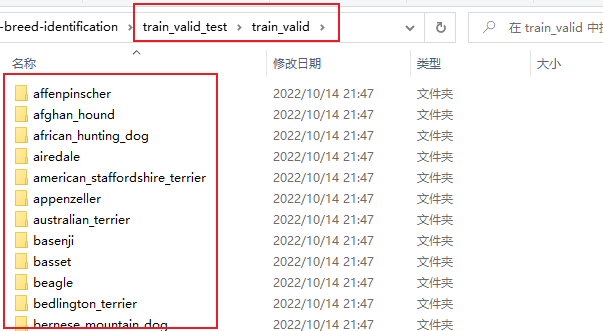

In [34]:
# 整理训练和验证集。
for train_file in os.listdir(os.path.join(data_dir, train_dir)):
    idx = train_file.split('.')[0]
    label = idx_label[idx]
    mkdir_if_not_exist([data_dir, input_dir, 'train_valid', label])
    shutil.copy(os.path.join(data_dir, train_dir, train_file),
                os.path.join(data_dir, input_dir, 'train_valid', label))

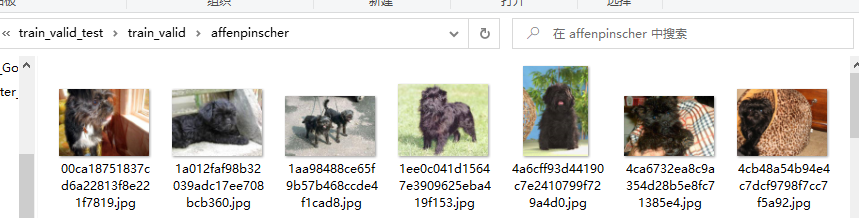

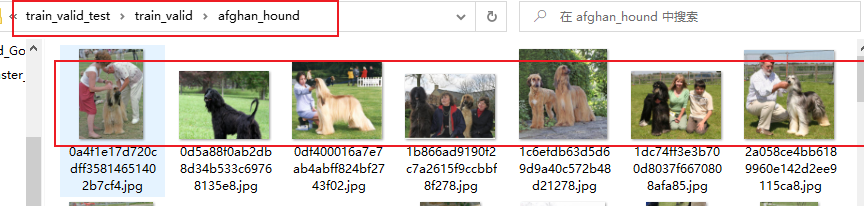

In [37]:
# 整理训练和验证集。
for train_file in os.listdir(os.path.join(data_dir, train_dir)):
    idx = train_file.split('.')[0]
    label = idx_label[idx]
    mkdir_if_not_exist([data_dir, input_dir, 'train_valid', label])
    shutil.copy(os.path.join(data_dir, train_dir, train_file),
                os.path.join(data_dir, input_dir, 'train_valid', label))
    if label not in label_count or label_count[label] < num_valid_per_label:
        mkdir_if_not_exist([data_dir, input_dir, 'valid', label])
        shutil.copy(os.path.join(data_dir, train_dir, train_file),
                    os.path.join(data_dir, input_dir, 'valid', label))
        label_count[label] = label_count.get(label, 0) + 1
    else:
        mkdir_if_not_exist([data_dir, input_dir, 'train', label])
        shutil.copy(os.path.join(data_dir, train_dir, train_file),
                    os.path.join(data_dir, input_dir, 'train', label))

In [38]:
# 整理测试集。
mkdir_if_not_exist([data_dir, input_dir, 'test', 'unknown'])
for test_file in os.listdir(os.path.join(data_dir, test_dir)):
    shutil.copy(os.path.join(data_dir, test_dir, test_file),
                os.path.join(data_dir, input_dir, 'test', 'unknown'))

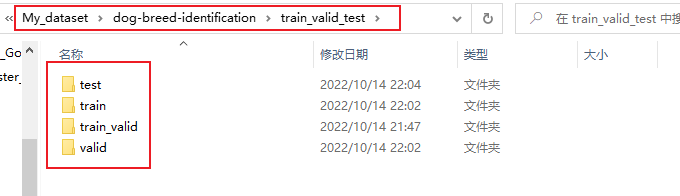

## 加载数据集

In [40]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, datasets
from PIL import Image
import pandas as pd
import numpy as np
# 过滤警告信息
import warnings
warnings.filterwarnings("ignore")

In [41]:
transform_train = transforms.Compose([
    # 随机对图像裁剪出面积为原图像面积0.08~1倍、且高和宽之比在3/4~4/3的图像，再放缩为高和宽均为224像素的新图像
    transforms.RandomResizedCrop(28, scale=(0.08, 1.0),
                                 ratio=(3.0 / 4.0, 4.0 / 3.0)),
    # 以0.5的概率随机水平翻转
    transforms.RandomHorizontalFlip(),
    # 随机更改亮度、对比度和饱和度
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),
    # 对各个通道做标准化，(0.485, 0.456, 0.406)和(0.229, 0.224, 0.225)是在ImageNet上计算得的各通道均值与方差
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet上的均值和方差
])

In [42]:
# 在测试集上的图像增强只做确定性的操作
transform_test = transforms.Compose([
    transforms.Resize(28),
    # 将图像中央的高和宽均为224的正方形区域裁剪出来
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [43]:
# 然后开始加载数据集
new_data_dir = "E:\data_set\My_dataset\dog-breed-identification\train_valid_test"